# Welcome to my project!

### Motivation 
I started learning python and wanted to use the skills I learned while also learning data science. I chose this project because I wanted to play with and learn how to manipulate large datasets as well as turn them into a visually pleasing form. As a new woman in tech, I wanted to see which languages women knew and what languages they are learning compared to men.

### What I did
Compared the number of women and men by the languages they know 

* Created a bar chart by showing the number of women and men by which languages they know

* Created a pie chart by known language and the ratio of gender 

### Sources
**Dataset provided by <a href="https://www.kaggle.com/hackerrank/developer-survey-2018" target="_blank">HackerRank</a>**

In [160]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [161]:
# Import dataframe
df_value = pd.read_csv("HackRankDataset.csv")

In [162]:
# Created a new dataframe with only gender and languages
df = df_value[['q3Gender', 'q25LangC', 'q25LangCPlusPlus', 'q25LangJava', 'q25LangPython', 'q25LangRuby', 'q25LangJavascript', 'q25LangCSharp', 'q25LangGo', 'q25LangSwift', 'q25LangR']]

# Renamed the columns to easily work with
df.columns = ['Gender', 'C', 'C++', 'Java', 'Python', 'Ruby', 'Javascript', 'C#', 'Go', 'Swift', 'R']

In [145]:
df.head()

,Gender,C,C++,Java,Python,Ruby,Javascript,C#,Go,Swift,R
0,Female,Will Learn,Will Learn,Know,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,Know
1,Male,NaN,NaN,Know,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Female,Will Learn,Will Learn,Will Learn,Know,Will Learn,Know,Will Learn,Will Learn,Will Learn,Will Learn
3,Male,NaN,Know,Will Learn,Will Learn,Know,Will Learn,Know,NaN,NaN,NaN
4,Female,NaN,NaN,NaN,NaN,NaN,Know,NaN,NaN,NaN,NaN


In [163]:
# Split the dataframe by gender
female = df[df['Gender'] == 'Female'].drop(columns='Gender')
male = df[df['Gender'] == 'Male'].drop(columns='Gender')

In [164]:
female.head()

,C,C++,Java,Python,Ruby,Javascript,C#,Go,Swift,R
0,Will Learn,Will Learn,Know,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,Will Learn,Know
2,Will Learn,Will Learn,Will Learn,Know,Will Learn,Know,Will Learn,Will Learn,Will Learn,Will Learn
4,NaN,NaN,NaN,NaN,NaN,Know,NaN,NaN,NaN,NaN
13,NaN,Will Learn,Know,Know,Know,Know,Will Learn,Will Learn,NaN,NaN
14,NaN,Will Learn,Will Learn,Know,Will Learn,Will Learn,Will Learn,NaN,NaN,NaN


## Used the "melt" function in pandas
I transformed the dataset from wide to long in order to use the Seaborn countplot function

In [148]:
# "Melt" languages columns together by language and value
# This helps using the Seaborn countplot function by plotting the "variable" on the x-axis and "value" on the y-axis
female_melt = pd.melt(female)
male_melt = pd.melt(male)

In [149]:
# Drop all "NaN" values
female_melt.dropna(subset=['value'], inplace=True)
male_melt.dropna(subset=['value'], inplace=True)

## Bar Charts

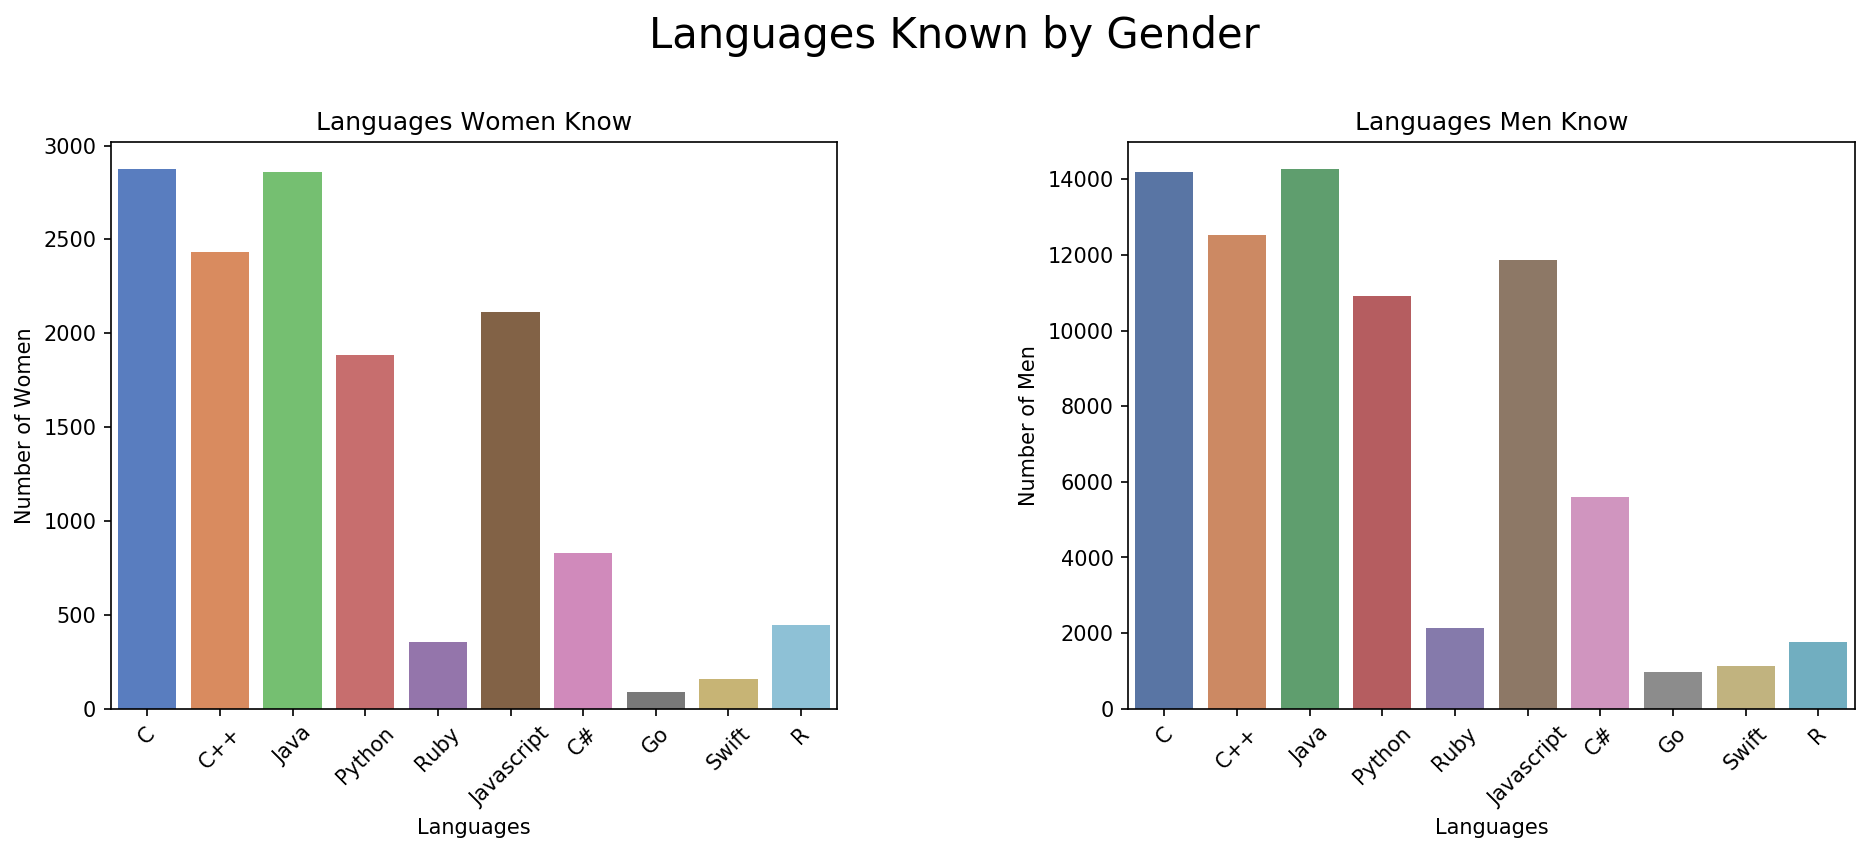

In [158]:
# Languages Known By Gender

fig1 = plt.figure(dpi=150)
fig1.set_figheight(5)
fig1.set_figwidth(15)
sns.set_palette("muted")
fig1.subplots_adjust(hspace=0, wspace=0.4)
fig1.suptitle('Languages Known by Gender', fontsize=20, y=1.05)

# Women Known
plt.subplot(1, 2, 1)
chart1 = sns.countplot(data=female_melt[female_melt['value'] == 'Know'], x="variable")
plt.title("Languages Women Know")
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45)
plt.ylabel('Number of Women')
plt.xlabel('Languages')
sns.set_palette("deep")


# Men Known
plt.subplot(1, 2, 2)
chart2 = sns.countplot(data=male_melt[male_melt['value'] == 'Know'], x="variable")
plt.title("Languages Men Know")
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=45)
plt.ylabel('Number of Men')
plt.xlabel('Languages')
sns.set_palette("deep")


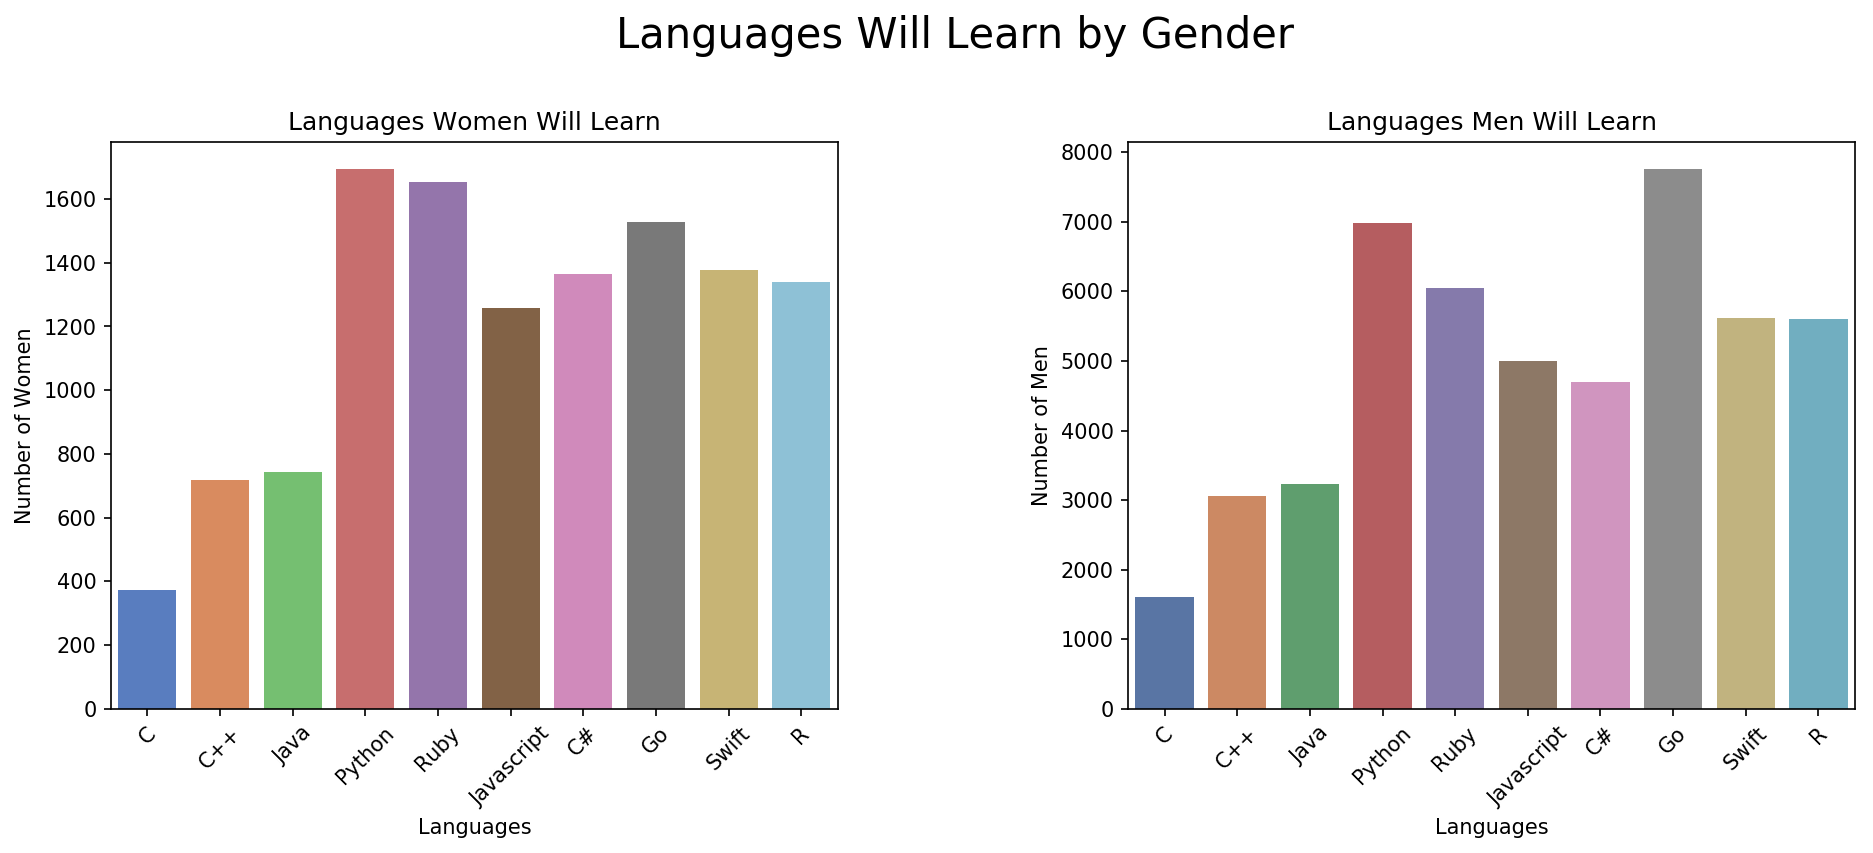

In [157]:
# Languages will Learn by Gender

fig1 = plt.figure(dpi=150)
fig1.set_figheight(5)
fig1.set_figwidth(15)
sns.set_palette("muted")
fig1.subplots_adjust(hspace=0, wspace=0.4)
fig1.suptitle('Languages Will Learn by Gender', fontsize=20, y=1.05)

# Women Will Learn
plt.subplot(1, 2, 1)
chart1 = sns.countplot(data=female_melt[female_melt['value'] == 'Will Learn'], x="variable")
plt.title("Languages Women Will Learn")
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45)
plt.ylabel('Number of Women')
plt.xlabel('Languages')
sns.set_palette("deep")


# Men Will Learn
plt.subplot(1, 2, 2)
chart2 = sns.countplot(data=male_melt[male_melt['value'] == 'Will Learn'], x="variable")
plt.title("Languages Men Will Learn")
chart2.set_xticklabels(chart2.get_xticklabels(), rotation=45)
plt.ylabel('Number of Men')
plt.xlabel('Languages')
sns.set_palette("deep")

## Pie Charts

In [152]:
# Pie chart showing percentage of Men and Women who know which language

In [153]:
language = ['C', 'C++', 'Java', 'Python', 'Ruby', 'Javascript', 'C#', 'Go', 'Swift', 'R']

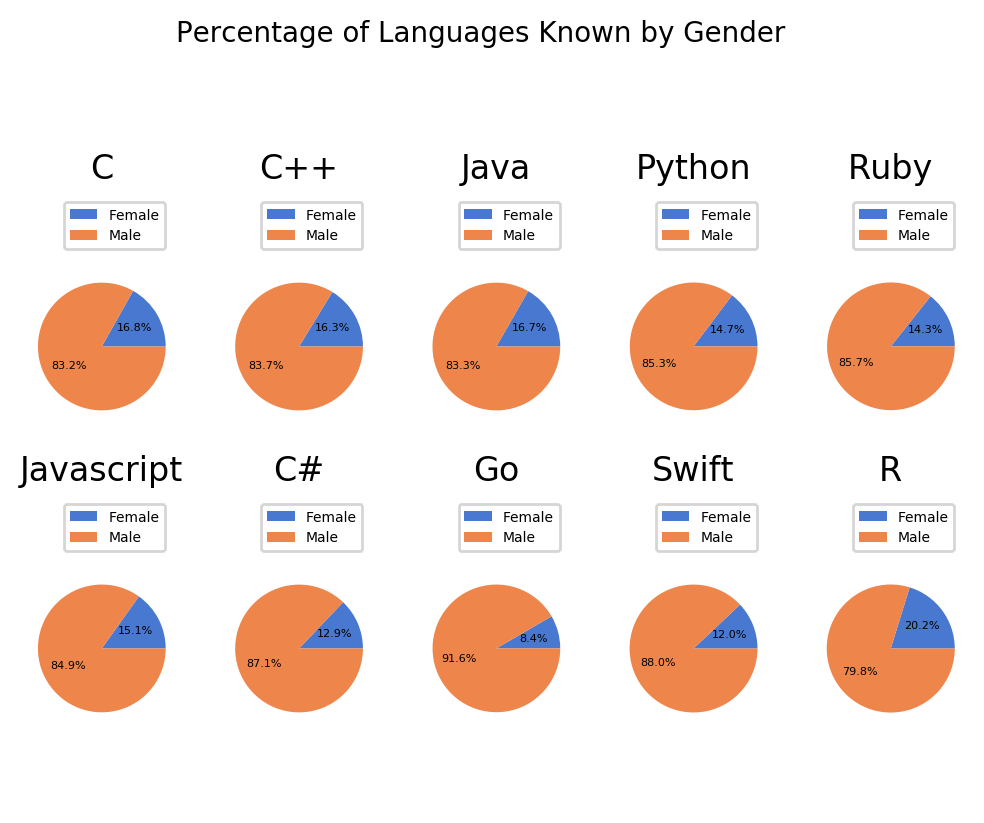

In [159]:
fig2 = plt.figure(dpi=200)
sns.set_palette("muted")
fig2.subplots_adjust(hspace=0, wspace=0.4)
fig2.suptitle('Percentage of Languages Known by Gender', fontsize=10, y=1.1)

subindex = 1
for element in language:
    plt.subplot(2, 5, subindex)
    plt.pie([
        df[(df[element]=='Know') &(df['Gender']=="Female")].shape[0],
        df[(df[element]=='Know') &(df['Gender']=="Male")].shape[0]
        ],
        autopct='%0.1f%%', textprops={'fontsize': 4})

    plt.axis('equal')
    plt.legend(df['Gender'], loc=1, prop={'size': 5})
    plt.title(element)
    subindex = subindex + 1
    
    
    